# Simple Sklearn start

## Simulation Data

We will generate a one-dimensional dataset with a simple model (including some noise), and we will try to fit a function to this data. With this function, we can predict values on new data points. This is a curve fitting regression problem.

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#define a deterministic nonlinear function underlying our generative model:
def f(x):
    return np.exp(3 * x)

In [5]:
#generate the values along the curve on [0,2].
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [6]:
# let's generate data points within [0,1]. We use the function f and we add some Gaussian noise.
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + 3 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generative model')

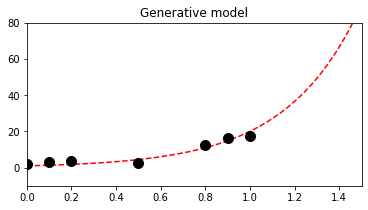

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--r')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

### Linear Regression

In [8]:
y.shape

(7,)

In [11]:
newx=x[:, np.newaxis]#add one dimention
newx.shape

(7, 1)

We use scikit-learn to fit a linear model to the data. There are three steps. First, we create the model (an instance of the LinearRegression class). Then, we fit the model to our data. Finally, we predict values from our trained model.

In [10]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(newx, y)
# Now, we predict points with our trained model.
newxr=x_tr[:, np.newaxis]
y_lr = lr.predict(newxr)
#We need to convert x and x_tr to column vectors, as it is a general convention in scikit-learn that observations are rows, while features are columns. Here, we have seven observations with one feature.

In [12]:
print(lr.coef_) 

[15.86377317]


In [13]:
y_lr.shape

(200,)

In [14]:
r2 = round(lr.score(newx, y),2)
print(r2)

0.85


Text(0.5, 1.0, 'Linear regression')

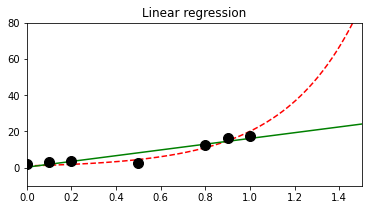

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--r')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")

In [17]:
y_pred = lr.predict(x[:, np.newaxis])
y_pred.shape

(7,)

In [18]:
np.mean((y_pred - y)**2)# mean square error

6.3514160565126945

In [19]:
fig.savefig("linearregression1.pdf")

In [20]:
from sklearn.metrics import mean_squared_error

mse = (mean_squared_error(y, y_pred))
r2 = round(lr.score(newx, y),2)

print("The model performance for training set:")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set:
MSE is 6.3514160565126945
R2 score is 0.85


### Polynomial Regression

we will fit a polynomial function to our data points. We can still use linear regression for this, by precomputing the exponents of our data points. This is done by generating a Vandermonde matrix, using the np.vander() function. 

In [21]:
x

array([0. , 0.1, 0.2, 0.5, 0.8, 0.9, 1. ])

In [22]:
np.vander(x, 2 + 1) #https://numpy.org/doc/1.18/reference/generated/numpy.vander.html, https://en.wikipedia.org/wiki/Vandermonde_matrix
# the i-th output column is the input vector raised element-wise to the power of N - i - 1

array([[0.  , 0.  , 1.  ],
       [0.01, 0.1 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.25, 0.5 , 1.  ],
       [0.64, 0.8 , 1.  ],
       [0.81, 0.9 , 1.  ],
       [1.  , 1.  , 1.  ]])

Coefficients, degree 2:
	 25.21 -9.35 0.00
MSE:  1.8520013389868606
MSE2:  1.8520013389868606
R2:  0.96
Coefficients, degree 7:
	 268.53 -583.25 16.04 642.97 -367.63 27.33 11.64 0.00
MSE:  4.422812055730058e-27
MSE2:  4.422812055730058e-27
R2:  1.0


Text(0.5, 1.0, 'Linear regression')

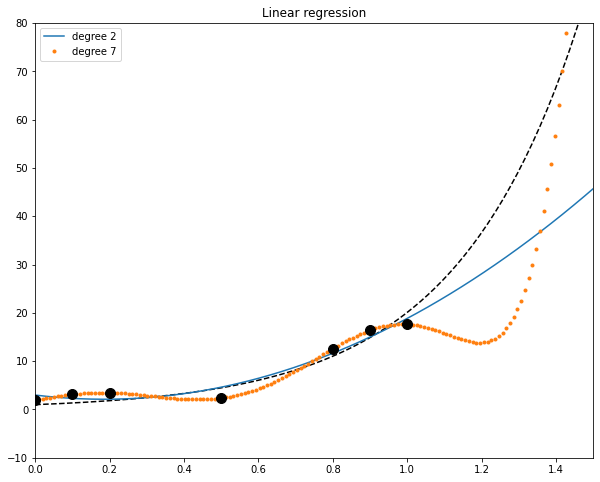

In [23]:
from sklearn.metrics import mean_squared_error

lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(x_tr, y_tr, '--k')

#draw two cases: degree=2, degree=7
for deg, s in zip([2, 7], ['-', '.']):
    x_train=np.vander(x, deg + 1)
    lrp.fit(x_train, y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.2f}' for c in lrp.coef_))
    y_pred = lrp.predict(x_train)
    #print(y_pred)
    mse=np.mean((y_pred - y)**2)# mean square error
    mse2 = (mean_squared_error(y, y_pred))
    r2 = round(lrp.score(x_train, y),2)
    print("MSE: ", mse)
    print("MSE2: ", mse2)
    print("R2: ", r2)
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")

The high degree polynomial seems really bad at predicting values outside the data points (look for example at the x≥1 portion). This is what we call overfitting; by using a too-complex model, we obtain a better fit on the trained dataset, but a less robust model outside this set.

### Ridge and Lasso regression
It works like linear regression except that it prevents the polynomial's coefficients from becoming too big. By adding a regularization term in the loss function, ridge regression imposes some structure on the underlying model. 

bias/variance tradeoff: the larger the ridge alpha parameter, the higher the bias and the lower the variance.
The bias introduced by the ridge regression is called a regularization.

Coefficients, degree 2: 11.19 4.25 0.00
MSE:  3.269113952565109
MSE2:  3.269113952565109
R2:  0.92
Coefficients, degree 7: 1.45 1.70 1.97 2.25 2.50 2.63 2.40 0.00
MSE:  3.6263303903185884
MSE2:  3.6263303903185884
R2:  0.91


Text(0.5, 1.0, 'Ridge regression')

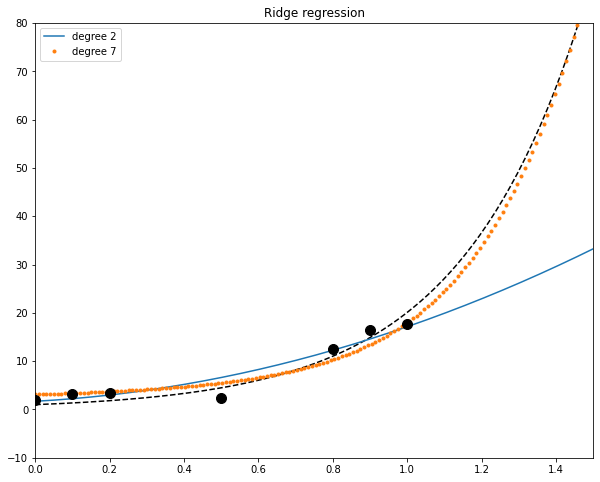

In [24]:
#ridge = lm.Ridge(alpha=.5)
ridge = lm.RidgeCV() #scikit-learn provides another model called RidgeCV, which includes a parameter search with cross-validation. In practice, this means that we don't have to tweak this parameter by hand

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 7], ['-', '.']):
    x_train=np.vander(x, deg + 1)
    ridge.fit(x_train, y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in ridge.coef_))
    y_pred = ridge.predict(x_train)
    #print(y_pred)
    mse=np.mean((y_pred - y)**2)# mean square error
    mse2 = (mean_squared_error(y, y_pred))
    r2 = round(ridge.score(x_train, y),2)
    print("MSE: ", mse)
    print("MSE2: ", mse2)
    print("R2: ", r2)

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Ridge regression")

Coefficients, degree 2: 15.64 0.00 0.00
MSE:  2.508217473767458
MSE2:  2.508217473767458
R2:  0.94
Coefficients, degree 7: 0.00 0.00 0.00 0.00 11.89 4.12 0.00 0.00
MSE:  2.0552979602698715
MSE2:  2.0552979602698715
R2:  0.95


Text(0.5, 1.0, 'Lasso regression')

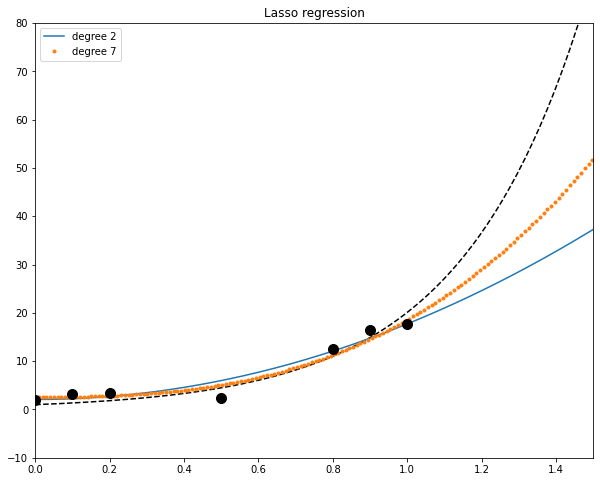

In [25]:
regr = lm.Lasso(alpha=0.1)
#regr = lm.LassoCV()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 7], ['-', '.']):
    x_train=np.vander(x, deg + 1)
    regr.fit(x_train, y)
    y_lasso = regr.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lasso, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in regr.coef_))
    y_pred = regr.predict(x_train)
    #print(y_pred)
    mse=np.mean((y_pred - y)**2)# mean square error
    mse2 = (mean_squared_error(y, y_pred))
    r2 = round(regr.score(x_train, y),2)
    print("MSE: ", mse)
    print("MSE2: ", mse2)
    print("R2: ", r2)

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Lasso regression")

## Boston housing dataset

In [26]:
from	sklearn.datasets import load_boston 
from	sklearn.preprocessing	import scale 
boston	=	load_boston() #Boston	housing	prices, from UCI

In [27]:
boston #13 feature variables, 506 samples in this dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [28]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [29]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [34]:
print(boston.DESCR) #The details about the features 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
!cp /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv .

cp: cannot stat '/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv': No such file or directory


In [33]:
import pandas as pd

#Create a dataframe
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [36]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


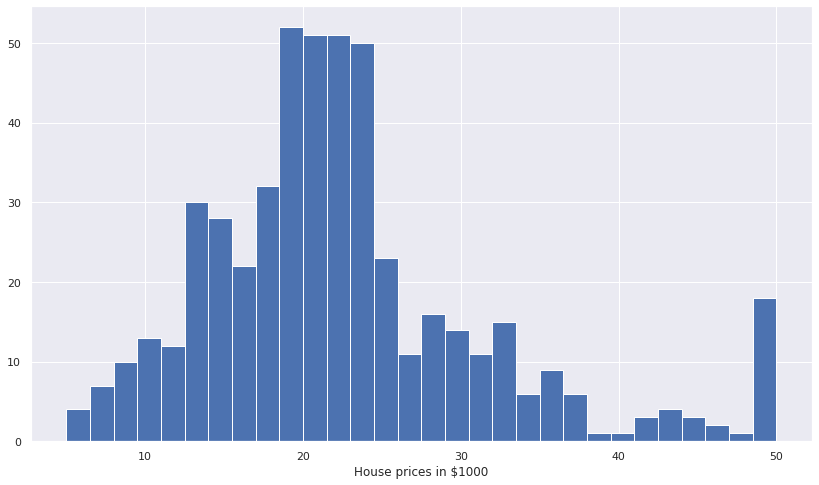

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
#To plot the graph embedded in the notebook
%matplotlib inline

sns.set(rc={'figure.figsize':(14,8)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

Create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

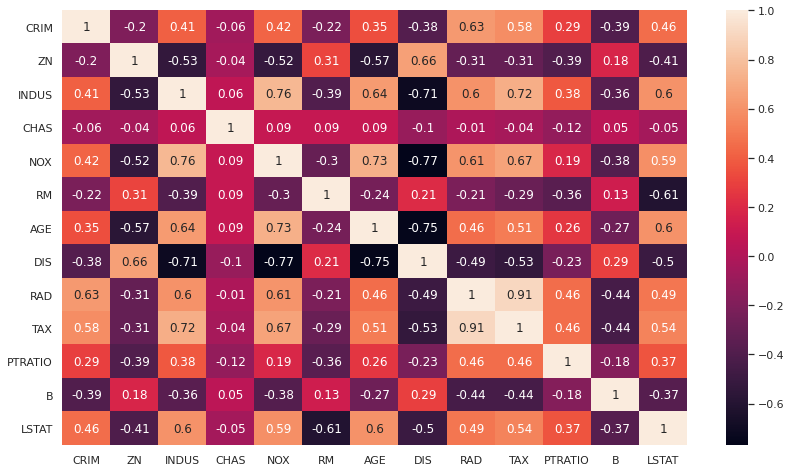

In [38]:
#Created a dataframe without the price col, since we need to see the correlation between the variables
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Linear Regression for one variable

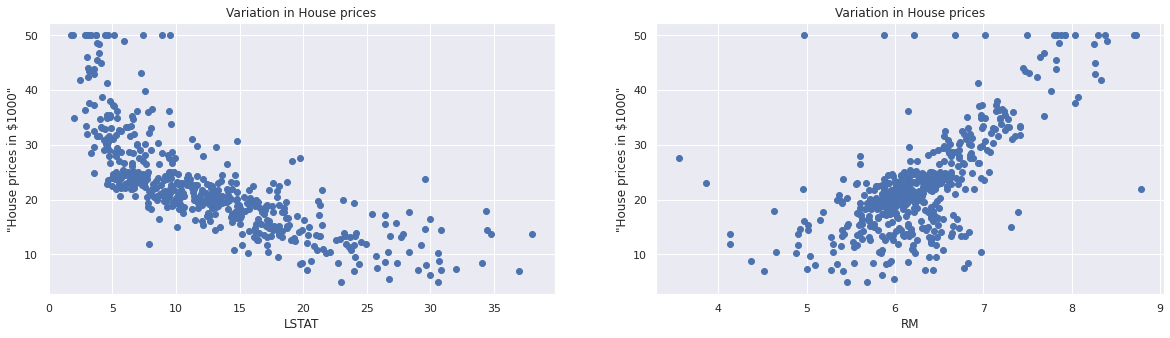

In [39]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

We will 1st predict the house price with just one variable and then move to the regression with all features

In [ ]:
X_rooms = bos.RM
y_price = bos.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

#Splitting the data into training and testing sets
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:
RMSE is 6.972277149440585
R2 score is 0.43


In [ ]:
# model evaluation for test set

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set:")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set:
Root Mean Squared Error: 4.895963186952216
R^2: 0.69


(50, 1)


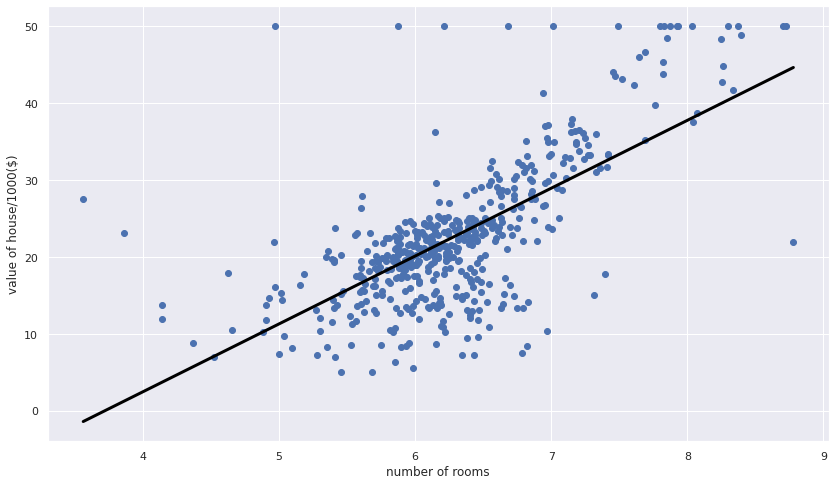

In [ ]:
#Plotting the model fitted line on the output variable
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
print(prediction_space.shape)
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

### Regression Model for All the variables

In [ ]:
X = bos.drop('PRICE', axis = 1)
print("X shape: ", X.shape)
y = bos['PRICE']
print("Y shape: ", y.shape)
#alternative way:
# X	=	scale(boston.data) 
# print("X shape: ", X.shape)
# y	=	boston.target 
# print("Y shape: ", y.shape)

X shape:  (506, 13)
Y shape:  (506,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (404, 13)
X_test shape:  (102, 13)
y_train shape:  (404,)
y_test shape:  (102,)


In [ ]:
#reg_all = LinearRegression()
reg_all = LinearRegression(normalize=True)
reg_all.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
RMSE is 4.6520331848801675
R2 score is 0.75


In [ ]:
# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2) ##use the score method to report the R2 measure

print("The model performance for training set")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
Root Mean Squared Error: 4.928602182665336
R^2: 0.67


Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

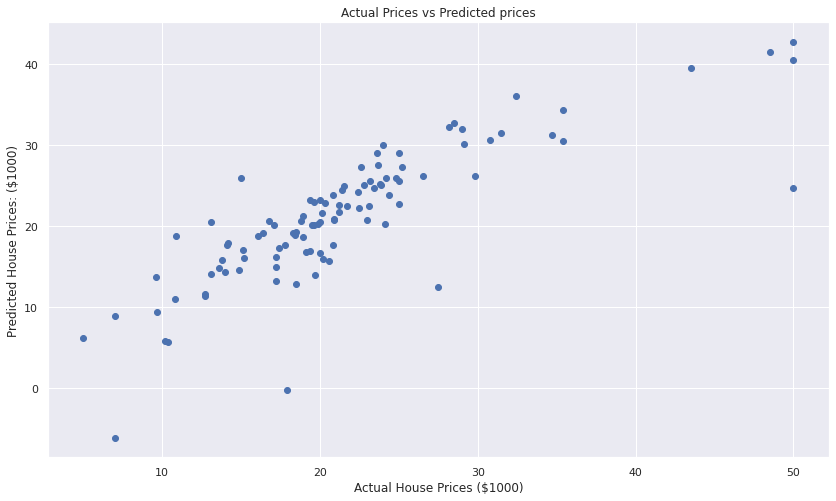

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
#plt.xticks(range(0, int(max(y_test)),2))
#plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")

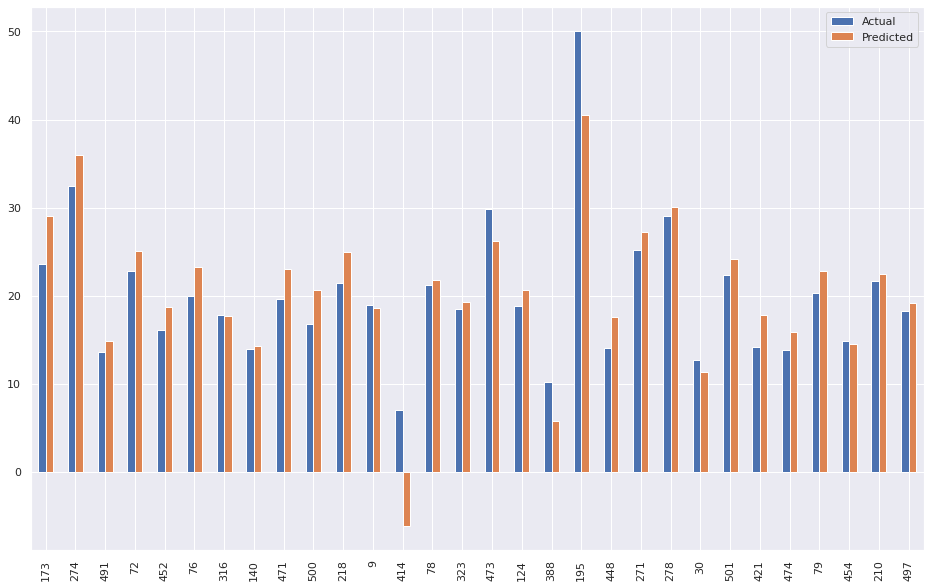

In [ ]:
dfcomp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfcomp1=dfcomp.head(30)
dfcomp1.plot(kind='bar',figsize=(16,10))

In [ ]:
print([a	+	':'	+	str(round(b,	2))	for	a,	b	in zip(boston.feature_names,	reg_all.coef_,)]) 

['CRIM:-0.11', 'ZN:0.03', 'INDUS:0.04', 'CHAS:2.78', 'NOX:-17.2', 'RM:4.44', 'AGE:-0.01', 'DIS:-1.45', 'RAD:0.26', 'TAX:-0.01', 'PTRATIO:-0.92', 'B:0.01', 'LSTAT:-0.51']


DIS is the	weighted distances to five employment centers
INDUS: nonretail	activities

### Ridge and Lasso Regression

In [ ]:
import sklearn.linear_model as lm

reg_all = lm.RidgeCV()#LinearRegression(normalize=True)
reg_all.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
RMSE is 4.65257736772704
R2 score is 0.75


In [ ]:
# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2) ##use the score method to report the R2 measure

print("The model performance for training set")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
Root Mean Squared Error: 4.929607009506314
R^2: 0.67


In [ ]:
reg_all = lm.LassoCV()#LinearRegression(normalize=True)
reg_all.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
RMSE is 4.969364126698404
R2 score is 0.72


In [ ]:
# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2) ##use the score method to report the R2 measure

print("The model performance for training set")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
Root Mean Squared Error: 4.9145688150417195
R^2: 0.67


linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576851
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123909
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921936


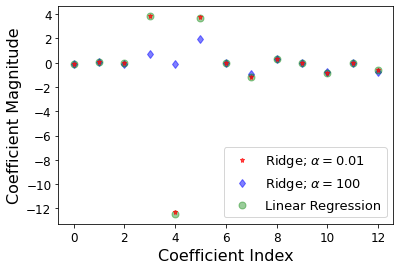

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
boston_df.head(10)
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576851
Lasso regression train score low alpha: 0.7414845253242521
Lasso regression test score low alpha: 0.7096270988778383
Lasso regression train score high alpha: 0.22175771924133436
Lasso regression test score high alpha: 0.24781706709707008


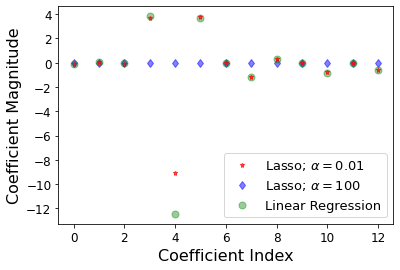

In [ ]:
from sklearn.linear_model import Lasso

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Lasso(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Lasso(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Lasso_train_score = rr.score(X_train,y_train)
Lasso_test_score = rr.score(X_test, y_test)
Lasso_train_score100 = rr100.score(X_train,y_train)
Lasso_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("Lasso regression train score low alpha:", Lasso_train_score)
print("Lasso regression test score low alpha:", Lasso_test_score)
print("Lasso regression train score high alpha:", Lasso_train_score100)
print("Lasso regression test score high alpha:", Lasso_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

## Diabetes Dataset

In [ ]:
import numpy as np
from sklearn import datasets

In [ ]:
diabetes_dataset=datasets.load_diabetes()

In [ ]:
diabetes_dataset

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [ ]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
diabetes_X=diabetes_dataset.data
print(diabetes_X.shape)

(442, 10)


In [ ]:
diabetes_y=diabetes_dataset.target
print(diabetes_y.shape)

(442,)


You also can simply use: diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

### Linear Regression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [ ]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)#mean square error

2004.5676026898207

In [ ]:
regr.score(diabetes_X_test, diabetes_y_test) ## Explained variance score: 1 is perfect prediction and 0 means that there is no linear relationship between X and y.

0.5850753022690575

### Ridge and Lasso Regression

A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called Ridge regression:

In [ ]:
regr = linear_model.Ridge(alpha=.1)# bias/variance tradeoff: the larger the ridge alpha parameter, the higher the bias and the lower the variance.
#The bias introduced by the ridge regression is called a regularization.

plt.figure() 
np.random.seed(0)

To improve the conditioning of the problem (i.e. mitigating the The curse of dimensionality), it would be interesting to select only the informative features and set non-informative ones, like feature 2 to 0. Ridge regression will decrease their contribution, but not set them to zero. Another penalization approach, called Lasso (least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called sparse method

In [ ]:
regr = linear_model.Lasso()

alphas = np.logspace(-4, -1, 6)
print(alphas)
scores = [regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
print("Best alpha:", best_alpha)
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[0.0001     0.00039811 0.00158489 0.00630957 0.02511886 0.1       ]
Best alpha: 0.025118864315095794
[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


# AUTO MPG Dataset

The Auto MPG dataset The dataset is available from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2020-06-09 22:00:00--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.1s    

2020-06-09 22:00:01 (228 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [ ]:
!mv ./auto-mpg.data ./auto-mpg.csv

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset_path = './auto-mpg.csv'
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#names: array, List of column names to use, If the file contains a header row, then you should explicitly pass header=0 to override the column names
#sep: Delimiter to use, default ‘,’, ' ' in the original csv file
#na_values: Additional strings to recognize as NA/NaN, ? in the original csv file
#comment: str, Indicates remainder of line should not be parsed
#skipinitialspacebool, default False, Skip spaces after delimiter.
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum() # hoursepower has 6 missing value 

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset.count
dataset = dataset.dropna() #drop those rows.
dataset.count

<bound method DataFrame.count of       MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
0    18.0          8         307.0  ...          12.0          70       1
1    15.0          8         350.0  ...          11.5          70       1
2    18.0          8         318.0  ...          11.0          70       1
3    16.0          8         304.0  ...          12.0          70       1
4    17.0          8         302.0  ...          10.5          70       1
..    ...        ...           ...  ...           ...         ...     ...
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[392 rows x 8 columns]>

In [ ]:
#The "Origin" column is categorical, not numeric. So convert that to a one-hot:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [ ]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')#Convert categorical variable into dummy/indicator variables.
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
#Split the data into train and test
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
train_dataset = dataset.sample(frac=0.8,random_state=0)
print(train_dataset.index)
test_dataset = dataset.drop(train_dataset.index)

Int64Index([146, 282,  69, 378, 331, 257, 310, 328, 125, 108,
            ...
            171,  70, 307,  49, 209, 281, 229, 150, 145, 182],
           dtype='int64', length=314)


In [ ]:
print("train dataset len: ", len(train_dataset))
print("test dataset len: ", len(test_dataset))

train dataset len:  314
test dataset len:  78


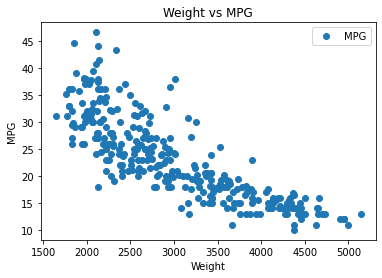

In [ ]:
train_dataset.plot(x='Weight', y='MPG', style='o')
plt.title('Weight vs MPG')  
plt.xlabel('Weight')  
plt.ylabel('MPG')  
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


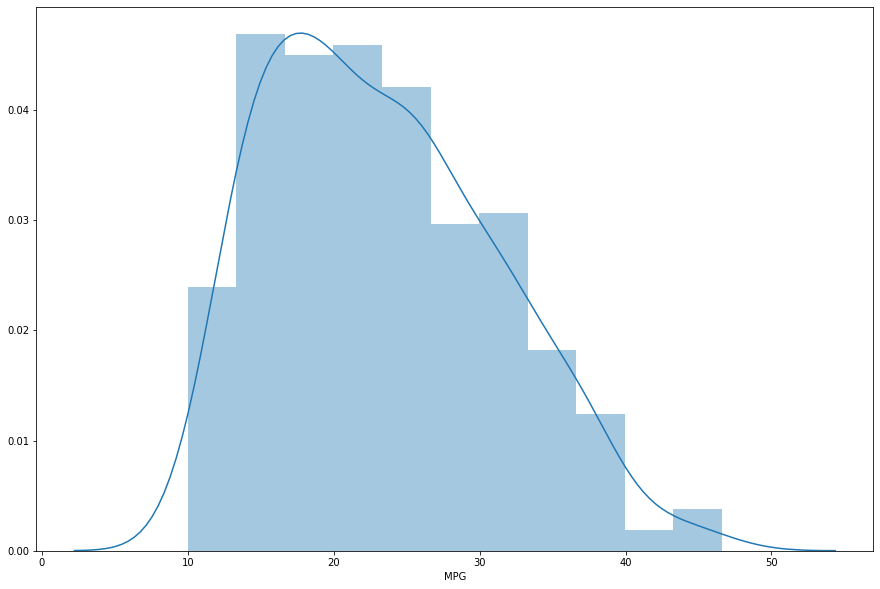

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(train_dataset['MPG'])

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics #https://scikit-learn.org/stable/

In [ ]:
X = train_dataset['Weight'].values.reshape(-1,1)#column as 1
y = train_dataset['MPG'].values.reshape(-1,1)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X, y) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[45.76121798]
[[-0.00750797]]


In [ ]:
X_test = test_dataset['Weight'].values.reshape(-1,1)#column as 1
y_test = test_dataset['MPG'].values.reshape(-1,1)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
dfcomp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfcomp

,Actual,Predicted
0,15.0,16.855547
1,10.0,11.111953
2,9.0,10.233521
3,25.0,29.033469
4,19.0,25.985235
...,...,...
73,34.0,27.779638
74,36.0,30.895445
75,34.0,28.905833
76,32.0,31.008064


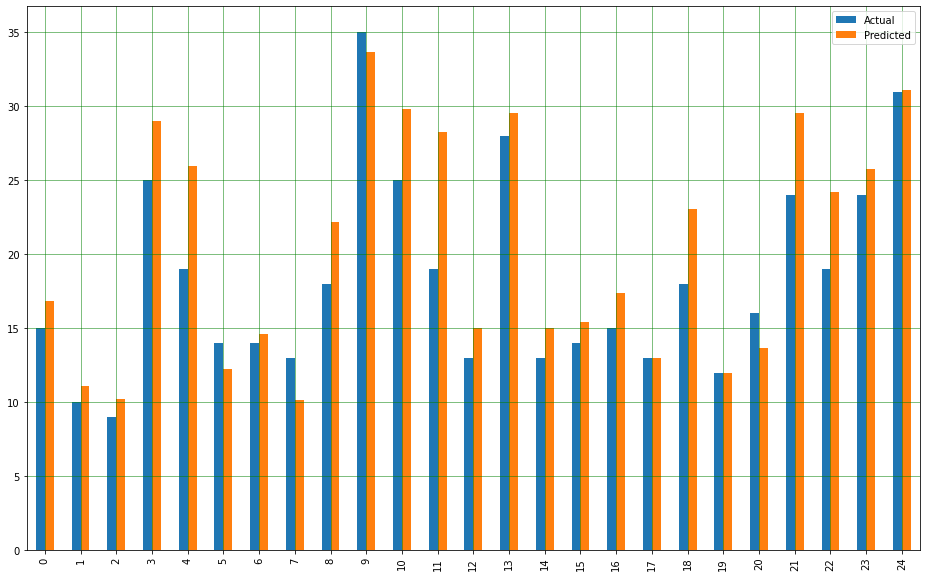

In [ ]:
df1 = dfcomp.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

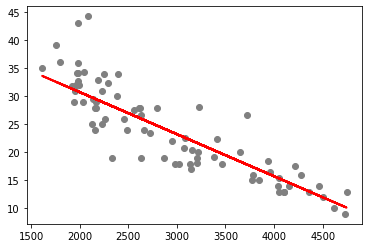

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.9344945081190428
Mean Squared Error: 15.33869208864019
Root Mean Squared Error: 3.916464233034714


## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_test)

In [ ]:
X_test

array([[3850.],
       [4615.],
       [4732.],
       [2228.],
       [2634.],
       [4464.],
       [4154.],
       [4746.],
       [3139.],
       [1613.],
       [2126.],
       [2330.],
       [4098.],
       [2164.],
       [4100.],
       [4042.],
       [3777.],
       [4363.],
       [3021.],
       [4499.],
       [4278.],
       [2158.],
       [2868.],
       [2660.],
       [1950.],
       [2451.],
       [3781.],
       [2489.],
       [3459.],
       [3221.],
       [2171.],
       [2984.],
       [3211.],
       [2945.],
       [2255.],
       [4215.],
       [3085.],
       [2035.],
       [1937.],
       [3651.],
       [1990.],
       [2155.],
       [4055.],
       [1985.],
       [1800.],
       [1985.],
       [3155.],
       [3070.],
       [3205.],
       [2560.],
       [2230.],
       [3140.],
       [2135.],
       [3955.],
       [4054.],
       [3940.],
       [1925.],
       [1975.],
       [3381.],
       [2800.],
       [2085.],
       [2290.],
       [

In [ ]:
x_poly

array([[1.0000000e+00, 3.8500000e+03, 1.4822500e+07],
       [1.0000000e+00, 4.6150000e+03, 2.1298225e+07],
       [1.0000000e+00, 4.7320000e+03, 2.2391824e+07],
       [1.0000000e+00, 2.2280000e+03, 4.9639840e+06],
       [1.0000000e+00, 2.6340000e+03, 6.9379560e+06],
       [1.0000000e+00, 4.4640000e+03, 1.9927296e+07],
       [1.0000000e+00, 4.1540000e+03, 1.7255716e+07],
       [1.0000000e+00, 4.7460000e+03, 2.2524516e+07],
       [1.0000000e+00, 3.1390000e+03, 9.8533210e+06],
       [1.0000000e+00, 1.6130000e+03, 2.6017690e+06],
       [1.0000000e+00, 2.1260000e+03, 4.5198760e+06],
       [1.0000000e+00, 2.3300000e+03, 5.4289000e+06],
       [1.0000000e+00, 4.0980000e+03, 1.6793604e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 4.1000000e+03, 1.6810000e+07],
       [1.0000000e+00, 4.0420000e+03, 1.6337764e+07],
       [1.0000000e+00, 3.7770000e+03, 1.4265729e+07],
       [1.0000000e+00, 4.3630000e+03, 1.9035769e+07],
       [1.0000000e+00, 3.021

In [ ]:
y_test.shape

(78, 1)

In [ ]:
x_poly.shape

(78, 3)

In [ ]:
model = LinearRegression()
model.fit(x_poly, y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([[ 0.00000000e+00, -1.92427663e-02,  1.76575447e-06]])

In [ ]:
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_poly_pred))
print(rmse)

3.695197913223615


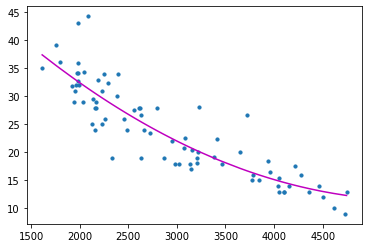

In [ ]:
import operator
plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
X_test, y_poly_pred = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred, color='m')
plt.show()

In [ ]:
r2 = metrics.r2_score(y_test,y_poly_pred)
print(r2)

-1.8624589267151248


## Multiple Linear Regression

In [ ]:
#using sklearn to split the dataset
from sklearn.model_selection import train_test_split 
dataset.isnull().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model Year      False
Europe          False
Japan           False
USA             False
dtype: bool

In [ ]:
#MPG	Cylinders	Displacement	Horsepower	Weight	Acceleration	Model Year
columnname=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
Xm = dataset[columnname].values
ym = dataset['MPG'].values

In [ ]:
print(dataset.index)
print(dataset.columns)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=392)
Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')


In [ ]:
dataset['MPG'].mean()

23.44591836734694

In [ ]:
Xm.shape

(392, 6)

In [ ]:
ym.shape

(392,)

In [ ]:
data_plt = pd.concat([dataset['MPG'], dataset['Cylinders']], axis=1)
data_plt

,MPG,Cylinders
0,18.0,8
1,15.0,8
2,18.0,8
3,16.0,8
4,17.0,8
...,...,...
393,27.0,4
394,44.0,4
395,32.0,4
396,28.0,4


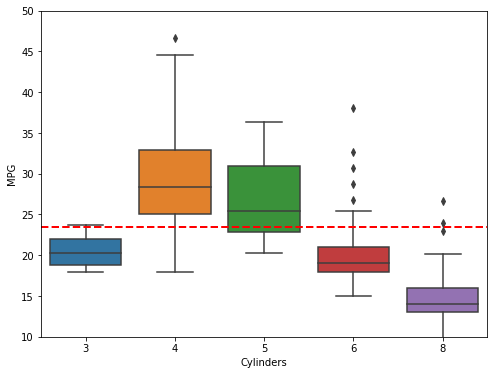

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Cylinders", y="MPG", data=data_plt)
fig.axis(ymin=10, ymax=50)
plt.axhline(dataset['MPG'].mean(),color='r',linestyle='dashed',linewidth=2)

In [ ]:
f.savefig("./boxfig.pdf")

In [ ]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=0)

In [ ]:
mregressor = LinearRegression()  
mregressor.fit(Xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mregressor.coef_

array([-0.24724021,  0.00725555,  0.00398814, -0.00706142,  0.14878918,
        0.73921536])

In [ ]:
coeff_df = pd.DataFrame(mregressor.coef_, columnname, columns=['Coefficient'])  
coeff_df

,Coefficient
Cylinders,-0.247240
Displacement,0.007256
Horsepower,0.003988
Weight,-0.007061
Acceleration,0.148789
Model Year,0.739215


In [ ]:
ym_pred = mregressor.predict(Xm_test)

In [ ]:
dfm = pd.DataFrame({'Actual': ym_test, 'Predicted': ym_pred})
df1 = dfm.head(25)

In [ ]:
df1

,Actual,Predicted
0,28.0,27.273449
1,22.3,26.398770
2,12.0,10.422526
3,38.0,33.277905
4,33.8,32.107158
5,19.4,23.566027
6,38.1,33.390100
7,30.0,25.225206
8,20.0,21.040899
9,20.0,26.218960


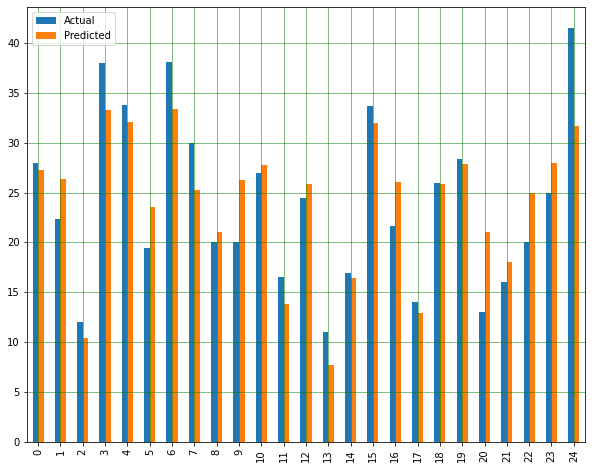

In [ ]:
fig=df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
fig.get_figure().savefig("bargraph2.pdf")

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ym_test, ym_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ym_test, ym_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ym_test, ym_pred)))

Mean Absolute Error: 2.6724608826273166
Mean Squared Error: 11.8782622888657
Root Mean Squared Error: 3.446485498136573


In [ ]:
print(metrics.r2_score(ym_test, ym_pred))

0.8088938602131776
